In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
import scipy.stats as stats


In [3]:
#Read the income return on the type of degree CSV
Degrees_Payback = pd.read_csv('degrees-that-pay-back.csv')
Degree_df = pd.DataFrame(Degrees_Payback)

#Ready the salary averages based on college type
Salary_By_College = pd.read_csv('salaries-by-college-type.csv')
College_Salary_df = pd.DataFrame(Salary_By_College)

#Read the income based upon region
Salary_By_Region = pd.read_csv('salaries-by-region.csv')
Region_Salary_df = pd.DataFrame(Salary_By_Region)



In [4]:
Region_Salary_df.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [5]:
#Check for duplicate rows and create a column for duplicate Rows in DF (There were non)
Region_Salary_df["Is_Duplicated"]= Region_Salary_df.duplicated()
Region_Salary_df.head()

#Removing Duplicate Rows if there were any
#Region_Salary_df = Region_Salary_df.drop_duplicates()
#Region_Salary_df

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Is_Duplicated
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00",False
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,False
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,False
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00",False
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN,False


In [6]:
#Rename the columns
Region_Salary_df.columns = ['School Name', 'Region', 'Starting_Salary', 'Mid_Career_Salary', 'Mid_10th', 'Mid_25th', 'Mid_75th', 'Mid_90th','Is_Duplicated']
Region_Salary_df.head()



,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_10th,Mid_25th,Mid_75th,Mid_90th,Is_Duplicated
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00",False
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,False
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,False
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00",False
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN,False


In [7]:
#Create list for loop
Dollar_Cols = ['Starting_Salary', 'Mid_Career_Salary', 'Mid_10th', 'Mid_25th', 'Mid_75th', 'Mid_90th']

#Loop through DF and convert columns with Dollar $ign (objects) to numeric values (integer)
for x in Dollar_Cols:
    Region_Salary_df[x] = Region_Salary_df[x].str.replace("$","")
    Region_Salary_df[x] = Region_Salary_df[x].str.replace(",","")
    Region_Salary_df[x] = pd.to_numeric(Region_Salary_df[x])

Region_Salary_df.head()

,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_10th,Mid_25th,Mid_75th,Mid_90th,Is_Duplicated
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0,False
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN,False
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN,False
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,False
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN,False


In [8]:
#Sort DF by Regions with the Highest to lowest 'Starting_Mid' Salaries
Region_Sort = Region_Salary_df.sort_values(['Region', 'Starting_Salary'], ascending=[True, False])
Region_Sort.head()

,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_10th,Mid_25th,Mid_75th,Mid_90th,Is_Duplicated
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN,False
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN,False
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0,False
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,False
5,Cal Poly San Luis Obispo,California,57200.0,101000.0,55000.0,74700.0,133000.0,178000.0,False


In [9]:
#Clean DF to the areas of focus
Region_Clean = Region_Salary_df[["School Name", "Region", "Starting_Salary", "Mid_Career_Salary", "Mid_90th"]]
Region_Clean.head()

,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_90th
0,Stanford University,California,70400.0,129000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN
3,"University of California, Berkeley",California,59900.0,112000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN


In [10]:
plt.style.use('seaborn-dark')

In [11]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

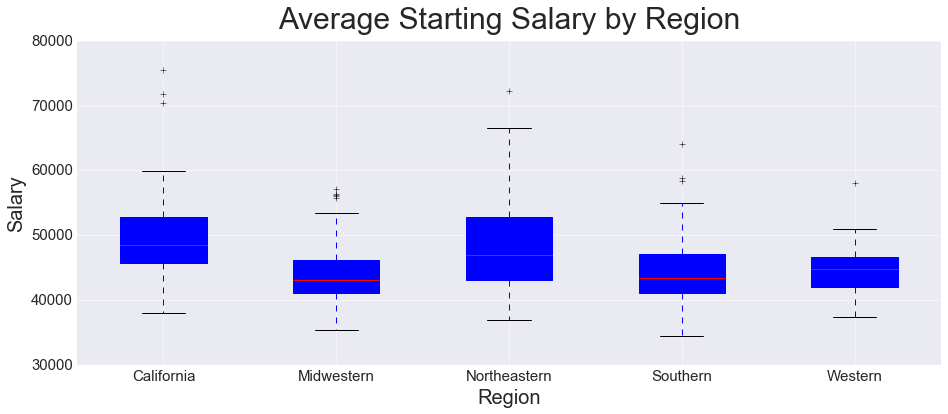

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a boxplot to compare means Starting Salary
Region_Clean.boxplot("Starting_Salary", by="Region", figsize=(15,6), fontsize=15, patch_artist=True)
plt.title("")

# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("Average Starting Salary by Region", fontsize=30)
plt.ylabel('Salary', fontsize=20)
plt.xlabel('Region', fontsize=20)
plt.show()

# Save the figure
plt.savefig("StartingSalMeanByRegion.png")


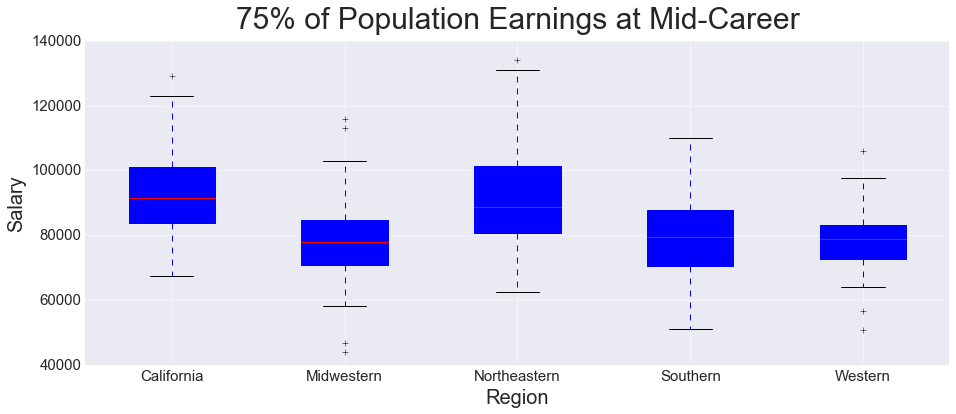

<Figure size 432x288 with 0 Axes>

In [28]:
# Create a boxplot to compare means Mid_25th Salary
Region_Clean.boxplot("Mid_Career_Salary", by="Region", figsize=(15,6), fontsize=15, patch_artist=True)
plt.title("")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("75% of Population Earnings at Mid-Career", fontsize=30)
plt.ylabel('Salary', fontsize=20)
plt.xlabel('Region', fontsize=20)
plt.show()
# Save the figure
plt.savefig("MidCareerSalaryByRegion.png")


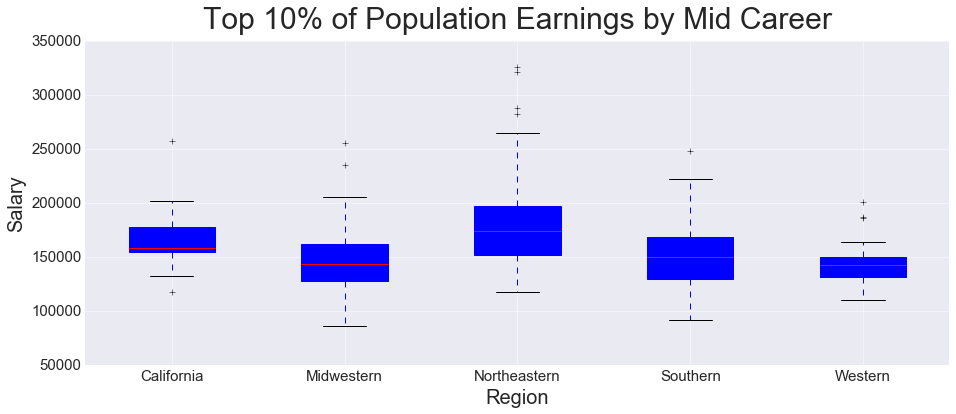

<Figure size 432x288 with 0 Axes>

In [29]:
# Create a boxplot to compare means Mid_90th Salary
Region_Clean.boxplot(by=["Region"], column=["Mid_90th"], figsize=(15,6), fontsize=15, patch_artist=True)
plt.title("")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("Top 10% of Population Earnings by Mid Career", fontsize=30)
plt.ylabel('Salary', fontsize=20)
plt.xlabel('Region', fontsize=20)
plt.show()
# Save the figure
plt.savefig("Mid90thSalaryByRegion.png")


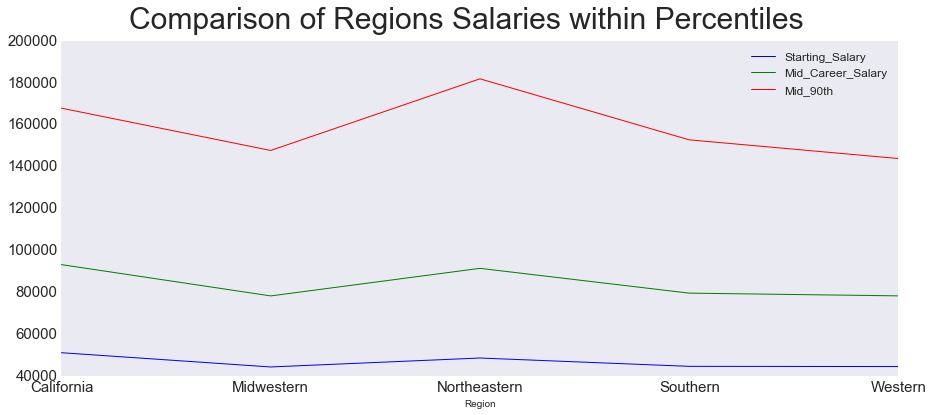

In [15]:
df = Region_Clean[['Starting_Salary','Mid_Career_Salary','Mid_90th','Region']]
var = df.groupby('Region').mean()
var.plot(kind='line', figsize=(15,6), fontsize=15,);

#Title
plt.suptitle("Comparison of Regions Salaries within Percentiles", fontsize=30)

plt.savefig("ComparingRegionSalPercentiles.png")

In [16]:
#Extract data by Region from the Master DF
Cali_Region = Region_Clean.loc[Region_Clean["Region"] == "California", :]
Cali_Region.head()

#List salary change over the lenght of mid-career by region; from school with hightest Starting_Mid to lowest Mid_90th
Cali_Sort = Cali_Region.sort_values(['Starting_Salary', 'School Name'], ascending=[False, True])
Cali_Sort.head()


,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_90th
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN
0,Stanford University,California,70400.0,129000.0,257000.0
3,"University of California, Berkeley",California,59900.0,112000.0,201000.0
5,Cal Poly San Luis Obispo,California,57200.0,101000.0,178000.0


In [17]:
#Give a description of the salary data by region.
Cali_Region.describe()

,Starting_Salary,Mid_Career_Salary,Mid_90th
count,28.000000,28.000000,22.000000
mean,51032.142857,93132.142857,167909.090909
std,8982.041901,15787.713309,29931.523581
min,38000.000000,67500.000000,117000.000000
25%,45650.000000,83675.000000,154000.000000
50%,48450.000000,91550.000000,158000.000000
75%,52825.000000,101000.000000,177750.000000
max,75500.000000,129000.000000,257000.000000


In [18]:
Western_Region = Region_Clean.loc[Region_Clean["Region"] == "Western", :]
Western_Region.head()

#List salary change over the lenght of mid-career by region; from school with hightest Starting_Mid to lowest Mid_90th
Western_Sort = Western_Region.sort_values(['Starting_Salary', 'School Name'], ascending=[False, True])
Western_Sort.head()


,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_90th
28,Colorado School of Mines,Western,58100.0,106000.0,201000.0
30,New Mexico Institute of Mining and Technology ...,Western,51000.0,93400.0,NaN
31,Brigham Young University (BYU),Western,49400.0,88600.0,164000.0
33,University of Washington (UW),Western,48800.0,85300.0,149000.0
56,Regis University,Western,48300.0,73800.0,117000.0


In [19]:
Western_Sort.describe()

,Starting_Salary,Mid_Career_Salary,Mid_90th
count,42.000000,42.000000,34.000000
mean,44414.285714,78200.000000,143823.529412
std,3935.180377,9743.740955,20338.753259
min,37300.000000,50600.000000,110000.000000
25%,42050.000000,72600.000000,131250.000000
50%,44850.000000,78850.000000,142500.000000
75%,46575.000000,83125.000000,150000.000000
max,58100.000000,106000.000000,201000.000000


In [20]:
#Extract data by Region from the Master DF
Northeastern_Region = Region_Clean.loc[Region_Clean["Region"] == "Northeastern", :]
Northeastern_Region.head()

#List salary change over the lenght of mid-career by region; from school with hightest Starting_Mid to lowest Mid_90th
Northeastern_Sort = Northeastern_Region.sort_values(['Starting_Salary', 'School Name'], ascending=[False, True])
Northeastern_Sort.head()


,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_90th
222,Massachusetts Institute of Technology (MIT),Northeastern,72200.0,126000.0,220000.0
221,Princeton University,Northeastern,66500.0,131000.0,261000.0
224,Harvard University,Northeastern,63400.0,124000.0,288000.0
226,"Polytechnic University of New York, Brooklyn",Northeastern,62400.0,114000.0,190000.0
227,Cooper Union,Northeastern,62200.0,114000.0,NaN


In [21]:
Northeastern_Sort.describe()

,Starting_Salary,Mid_Career_Salary,Mid_90th
count,100.000000,100.000000,82.000000
mean,48496.000000,91352.000000,181926.829268
std,7159.001115,15103.023177,42439.144663
min,36900.000000,62600.000000,117000.000000
25%,43150.000000,80825.000000,151500.000000
50%,47000.000000,88700.000000,173500.000000
75%,52825.000000,101250.000000,197250.000000
max,72200.000000,134000.000000,326000.000000


In [22]:
#Extract data by Region from the Master DF
Midwestern_Region = Region_Clean.loc[Region_Clean["Region"] == "Midwestern", :]
Midwestern_Region.head()

#List salary change over the lenght of mid-career by region; from school with hightest Starting_Mid to lowest Mid_90th
Midwestern_Sort = Midwestern_Region.sort_values(['Starting_Salary', 'School Name'], ascending=[False, True])
Midwestern_Sort.head()


,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_90th
77,University of Missouri - Rolla (UMR),Midwestern,57100.0,95800.0,166000.0
70,University of Notre Dame,Midwestern,56300.0,116000.0,235000.0
74,Case Western Reserve University,Midwestern,56200.0,96500.0,168000.0
73,Illinois Institute of Technology (IIT),Midwestern,56000.0,97800.0,165000.0
78,South Dakota School of Mines & Technology,Midwestern,55800.0,93400.0,147000.0


In [23]:
Midwestern_Sort.describe()

,Starting_Salary,Mid_Career_Salary,Mid_90th
count,71.000000,71.000000,64.000000
mean,44225.352113,78180.281690,147689.062500
std,5068.240560,12997.687923,28818.331452
min,35300.000000,43900.000000,85700.000000
25%,41100.000000,70850.000000,128000.000000
50%,43100.000000,77800.000000,143000.000000
75%,46250.000000,84700.000000,162250.000000
max,57100.000000,116000.000000,255000.000000


In [24]:
#Extract data by Region from the Master DF
Southern_Region = Region_Clean.loc[Region_Clean["Region"] == "Southern", :]
Southern_Region.head()

#List salary change over the lenght of mid-career by region; from school with hightest Starting_Mid to lowest Mid_90th
Southern_Sort = Southern_Region.sort_values(['Starting_Salary', 'School Name'], ascending=[False, True])
Southern_Sort.head()


,School Name,Region,Starting_Salary,Mid_Career_Salary,Mid_90th
141,Rice University,Southern,64000.0,110000.0,216000.0
143,Duke University,Southern,58900.0,106000.0,218000.0
144,Georgia Institute of Technology,Southern,58300.0,106000.0,183000.0
142,Georgetown University,Southern,55000.0,110000.0,248000.0
145,Washington and Lee University,Southern,53600.0,104000.0,NaN


In [25]:
Southern_Sort.describe()

,Starting_Salary,Mid_Career_Salary,Mid_90th
count,79.000000,79.000000,71.000000
mean,44521.518987,79505.063291,152769.014085
std,5626.099229,14067.592314,32587.980219
min,34500.000000,51000.000000,91300.000000
25%,41100.000000,70400.000000,129500.000000
50%,43400.000000,79400.000000,150000.000000
75%,47050.000000,87850.000000,168000.000000
max,64000.000000,110000.000000,248000.000000


In [26]:
#Find the mean for each period of Salary change and groupby the Region names
Region_df = Region_Clean.groupby('Region', as_index=False)['Starting_Salary','Mid_Career_Salary', 'Mid_90th'].mean()
Region_df


,Region,Starting_Salary,Mid_Career_Salary,Mid_90th
0,California,51032.142857,93132.142857,167909.090909
1,Midwestern,44225.352113,78180.281690,147689.062500
2,Northeastern,48496.000000,91352.000000,181926.829268
3,Southern,44521.518987,79505.063291,152769.014085
4,Western,44414.285714,78200.000000,143823.529412


In [27]:

g = sns.catplot("Region", "Starting_Mid", "Mid_25th", "Mid_90th", data=Region_Sort, kind="box")
g.set_axis_lables("Regions", "Salary")

TypeError: catplot() got multiple values for argument 'data'

In [ ]:
# Find the number of schools in each Region
School_Count_by_Region = Region_Salary_df['Region'].value_counts()
School_Count_by_Region

In [ ]:
#Create new DF that Sorts Region_df by Hightest to Lowest 'Starting_Mid'
Region_by_Start_Mid = Region_df.sort_values('Starting_Mid', ascending=False)
Region_by_Start_Mid

In [ ]:
# DATAFRAMES WITH TRIAL COLUMN ASSIGNED
df1 = pd.Cali_Region(np.random.randn(5,5), columns=list(2,5,8).assign(Salary="Starting_Mid")
df2 = pd.DataFrame(np.random.randn(5,5), columns=list(2,5,8).assign(Salary="Mid_25")
df3 = pd.DataFrame(np.random.randn(5,5), columns=list(2,5,8).assign(Salary="Mid_90th")

cdf = pd.concat([df1, df2, df3])                                # CONCATENATE
mdf = pd.melt(cdf, id_vars=['Trial'], var_name=['Number'])      # MELT

print(mdf.head())
#    Trial Number     value
# 0      1      1 -0.750615
# 1      1      1 -1.715070
# 2      1      1 -0.963404
# 3      1      1  0.360856
# 4      1      1 -1.190504

ax = sns.boxplot(x="Trial", y="value", hue="Number", data=mdf)  # RUN PLOT   
plt.show()

plt.clf()
plt.close()

In [ ]:
#Create new DF that Sorts Region_df by Hightest to Lowest 'Mid_75th'
Region_75th_Sal = Region_df.sort_values('Mid_75th', ascending=False)
Region_75th_Sal

In [ ]:
#Create new DF that Sorts Region_df by Hightest to Lowest 'Mid_90th'
Region_90th_Sal = Region_df.sort_values('Mid_90th', ascending=False)
Region_90th_Sal

In [ ]:
#Create groups for Analysis of Variances to test the differences between the Starting Means of the Regions
Salary_Mid_Gr1 = Region_Salary_df[Region_Salary_df['Region'] == 'Northeastern']['Starting_Mid']
Salary_Mid_Gr2 = Region_Salary_df[Region_Salary_df['Region'] == 'California']['Starting_Mid']
Salary_Mid_Gr3 = Region_Salary_df[Region_Salary_df['Region'] == 'Southern']['Starting_Mid']
Salary_Mid_Gr4 = Region_Salary_df[Region_Salary_df['Region'] == 'Midwestern']['Starting_Mid']
Salary_Mid_Gr5 = Region_Salary_df[Region_Salary_df['Region'] == 'Western']['Starting_Mid']

#Perform Analysis of Variance (ANOVA) test
stats.f_oneway(Salary_Mid_Gr1, Salary_Mid_Gr2, Salary_Mid_Gr3, Salary_Mid_Gr4, Salary_Mid_Gr5)